# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn import over_sampling

warnings.filterwarnings('ignore')


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4

# Load Dataset

In [ ]:
try:
  df = pd.read_csv('Churn_Modelling.csv')
except:
  df = df = pd.read_csv('https://raw.githubusercontent.com/chakraskun/churn-modelling/main/Churn_Modelling.csv')

In [ ]:
#melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Pengamatan:<br>
Tidak ada data yang missing, sehingga bisa dilanjutkan proses selanjutnya tanpa harus melakukan proses missing value

# Statistical Summary

In [ ]:
numerical = [
  # 'RowNumber',
  # 'CustomerId',
  'CreditScore',
  'Age',
  'Balance',
  'EstimatedSalary',
  'NumOfProducts','Tenure',  
]
categorical = [
  'Surname',
  'Geography',
  'Gender',
    'HasCrCard',
  'IsActiveMember',

]

In [ ]:
df[numerical].describe()

,CreditScore,Age,Balance,EstimatedSalary,NumOfProducts,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,1.530200,5.012800
std,96.653299,10.487806,62397.405202,57510.492818,0.581654,2.892174
min,350.000000,18.000000,0.000000,11.580000,1.000000,0.000000
25%,584.000000,32.000000,0.000000,51002.110000,1.000000,3.000000
50%,652.000000,37.000000,97198.540000,100193.915000,1.000000,5.000000
75%,718.000000,44.000000,127644.240000,149388.247500,2.000000,7.000000
max,850.000000,92.000000,250898.090000,199992.480000,4.000000,10.000000


Pengataman dari Fitur Numerical:
- Kolom `CreditScore`, `Age`, `EstimatedSalary`,`Tenure` sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh)
- Kolom `Balance` skewed

In [ ]:
df[categorical].describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Drop Column

In [ ]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

Kolom `RowNumber`,`CustomerId`,dan `Surname` didrop dikarenakan membunyai banyak value unique

# Outliers Handling

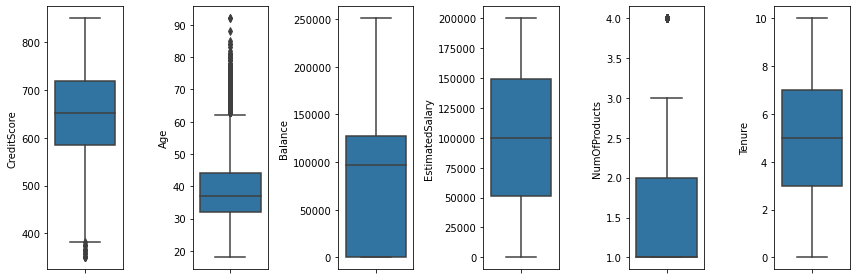

In [ ]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]])
    plt.tight_layout()

Feature `age` dan `numofproducts` tidak akan dibuang untuk data outliers dikarenakan secara konseptual hal tersebut masih memungkinkan, sehingga pada dataset ini akan melakukan handling pada feature `CreditScore`. Handling outliers akan menggunakan pendekatan konservatif yaitu Z-Score

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
zscore = np.abs(stats.zscore(df['CreditScore'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3)  # keep yang kurang dari 3 absolute z-scorenya
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9992


# Split data into train and test

In [ ]:
df_train,df_test = train_test_split(df,test_size=0.2, random_state=42) #Splitting the data into Train and Test

# Feature Scaling in Training Data

In [ ]:
#input code below
handled_dataset = [df_train, df_test]
for i in handled_dataset:
  i['LogAge'] = np.log(i['Age'])



In [ ]:
for i in handled_dataset:
  i['LogAgeNorm'] = MinMaxScaler().fit_transform(i['LogAge'].values.reshape(len(i), 1))
  i['BalanceStd'] = StandardScaler().fit_transform(i['Balance'].values.reshape(len(i), 1))
  i['BalanceNorm'] = MinMaxScaler().fit_transform(i['BalanceStd'].values.reshape(len(i), 1))
  i['EstimatedSalaryStd'] = StandardScaler().fit_transform(i['EstimatedSalary'].values.reshape(len(i), 1))
  i['EstimatedSalaryNorm'] = MinMaxScaler().fit_transform(i['EstimatedSalaryStd'].values.reshape(len(i), 1))
  i['TenureNorm'] = MinMaxScaler().fit_transform(i['Tenure'].values.reshape(len(i), 1))
  i['NumOfProductsNorm'] = MinMaxScaler().fit_transform(i['NumOfProducts'].values.reshape(len(i), 1))
  i['CreditScoreNorm'] = MinMaxScaler().fit_transform(i['CreditScore'].values.reshape(len(i), 1))


# Feature Encoding in Training and Test Data

kolom `gender` akan dilakukan label encoding, sementara `geography` akan menggunakan one-hot coding

In [ ]:
df_test.shape

(1999, 20)

#### Label Encoding 

In [ ]:
# input code below

mapping_gender = {
    'Female' : 0,
    'Male' : 1
  }
for i in handled_dataset:
  i['Gender'] = i['Gender'].map(mapping_gender)

#### One-hot coding

In [ ]:
# input code below
for i in handled_dataset:
  one_hot_encoding = pd.get_dummies(i['Geography'], prefix='geo')
  if i.shape[0] >7000:
    df_train = df_train.join(one_hot_encoding)
  if i.shape[0] < 2000:
    df_test = df_test.join(one_hot_encoding)


# Drop Column Outdated

In [ ]:
handled_dataset = [df_train, df_test]
for i in handled_dataset:
  i.drop(columns=['Geography','Age', 'Balance', 'EstimatedSalary', 'EstimatedSalaryStd', 
                  'BalanceStd', 'Tenure', 'NumOfProducts', 'LogAge', 'CreditScore'], inplace=True)

# Handling Imbalance

In [ ]:
X = df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col != 'Exited']]
y = df_train['Exited'].values
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X, y)

print('BEFORE')
print(pd.Series(y).value_counts())
print('----------------------')
print('AFTER')
print(pd.Series(y_over_SMOTE).value_counts())

BEFORE
0    6360
1    1633
dtype: int64
----------------------
AFTER
0    6360
1    3180
dtype: int64


# Modelling

In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [ ]:
X_train = X_over_SMOTE
y_train = y_over_SMOTE
X_test = df_test[[col for col in df_test.columns if (str(df_test[col].dtype) != 'object') and col != 'Exited']]
y_test = df_test['Exited'].values

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test on train Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test on train Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test on train Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test on train Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

<b>Prediction Result (in data test)</b>

In [ ]:
y_pred = lr.predict(X_test)

<b>Evaluation</b>

In [ ]:
lr_recall=recall_score(y_test, y_pred)
lr_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%lr_recall)
print('Accuracy: %.2f'%lr_acc)


Recall: 0.42
Accuracy: 0.80


In [ ]:
print('Train score: ' + str(lr.score(X_train, y_train))) #accuracy
print('Test score:' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.7460167714884696
Test score:0.8009004502251126


#### Hyperparemter Tuning Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
hyperparameters = {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Inisiasi model
lr = LogisticRegression() # Init lr dengan RandomizedSearch, cross validation = 5
lr_tuned = GridSearchCV(
    estimator=lr,
    param_grid=hyperparameters,
    cv=5,
    scoring='recall',
    verbose=False,
    n_jobs=-1
)

# Fitting Model & Evaluation
lr_tuned.fit(X_train, y_train)
y_pred = lr_tuned.predict(X_test)


In [ ]:
lr_recall=recall_score(y_test, y_pred)
lr_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%lr_recall)
print('Accuracy: %.2f'%lr_acc)


Recall: 0.42
Accuracy: 0.80


In [ ]:
show_best_hyperparameter(lr_tuned.best_estimator_, hyperparameters)

Best max_iter: 100
Best penalty: l1
Best C: 10
Best solver: liblinear


In [ ]:
train_score_lr = lr_tuned.score(X_train, y_train)
test_score_lr = lr_tuned.score(X_test, y_test)
print('Train score: ', train_score_lr) #accuracy
print('Test score:', test_score_lr) #accuracy

Train score:  0.4779874213836478
Test score: 0.41919191919191917


In [ ]:
#feat_importances = pd.Series(lr_tuned.best_estimator_.feature_importances_, index=X.columns)
#ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
#ax.invert_yaxis()

#plt.xlabel('score')
#plt.ylabel('feature')
#plt.title('feature importance score')

## DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

<b>Prediction Result (in data test)</b>

In [ ]:
y_pred = dt.predict(X_test)

<b>Evaluation</b>

In [ ]:
dt_recall=recall_score(y_test, y_pred)
dt_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%dt_recall)
print('Accuracy: %.2f'%dt_acc)


Recall: 0.59
Accuracy: 0.76


In [ ]:
print('Train score: ' + str(dt.score(X_train, y_train))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7628814407203601


### Hyperparemter Tuning Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
max_depth = [int(x) for x in np.linspace(1, 300, num = 80)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100,200,500,1000] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50,100] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )



# Inisiasi model
dt = DecisionTreeClassifier() # Init knn dengan Gridsearch, cross validation = 5
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='recall',random_state=42)

# Fitting Model & Evaluation
dt_tuned.fit(X_train, y_train)
y_pred = dt_tuned.predict(X_test)

In [ ]:
dt_recall=recall_score(y_test, y_pred)
dt_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%dt_recall)
print('Accuracy: %.2f'%dt_acc)


Recall: 0.56
Accuracy: 0.73


In [ ]:
show_best_hyperparameter(dt_tuned.best_estimator_, hyperparameters)

Best max_depth: 209
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto


In [ ]:
train_score_dt = dt_tuned.score(X_train, y_train)
test_score_dt = dt_tuned.score(X_test, y_test)
print('Train score: ', train_score_dt) #accuracy
print('Test score:', test_score_dt) #accuracy

Train score:  1.0
Test score: 0.5606060606060606


Text(0.5, 1.0, 'feature importance score')

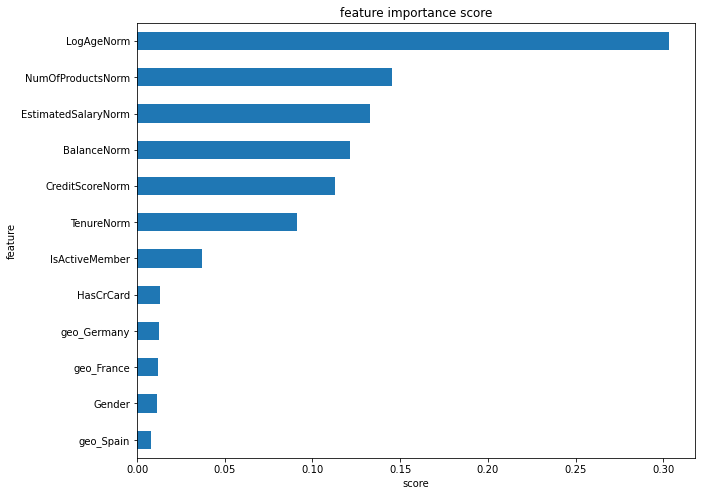

In [ ]:
feat_importances = pd.Series(dt_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## XGBOOST Classifier

In [ ]:
xg = XGBClassifier(random_state=42,eval_metric='logloss',use_label_encoder=False)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<b>Prediction Result (in data test)</b>

In [ ]:
y_pred = xg.predict(X_test)

<b>Evaluation</b>

In [ ]:
xg_recall=recall_score(y_test, y_pred)
xg_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%xg_recall)
print('Accuracy: %.2f'%xg_acc)


Recall: 0.63
Accuracy: 0.82


In [ ]:
print('Train score: ' + str(xg.score(X_train, y_train))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.9531446540880503
Test score:0.8209104552276139


### Hyperparemter Tuning Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# List Hyperparameters yang akan diuji
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Inisiasi model
xg = XGBClassifier(random_state=42,eval_metric='logloss',use_label_encoder=False) # Init knn dengan Gridsearch, cross validation = 5
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, scoring='recall',random_state=42)

# Fitting Model & Evaluation
xg_tuned.fit(X_train, y_train)
y_pred = xg_tuned.predict(X_test)


In [ ]:

xg_recall=recall_score(y_test, y_pred)
xg_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%xg_recall)
print('Accuracy: %.2f'%xg_acc)


Recall: 0.63
Accuracy: 0.82


In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 50
Best min_child_weight: 4
Best gamma: 1.0
Best tree_method: approx
Best colsample_bytree: 0.7000000000000001
Best eta: 0.31313131313131315
Best lambda: 0.6000000000000001
Best alpha: 0.6000000000000001


In [ ]:
train_score_xgboost = xg_tuned.score(X_train, y_train)
test_score_xgboost = xg_tuned.score(X_test, y_test)

print('Train score: ', train_score_xgboost) #accuracy
print('Test score:', test_score_xgboost) #accuracy

Train score:  0.9660377358490566
Test score: 0.6313131313131313


Text(0.5, 1.0, 'feature importance score')

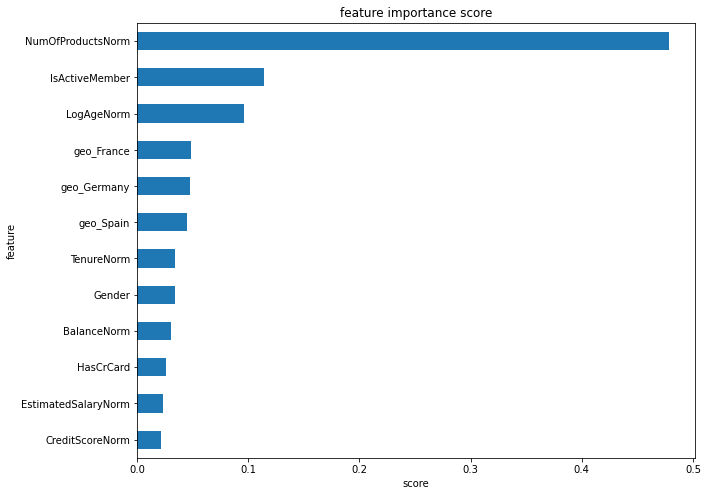

In [ ]:
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)


### Evaluation

In [ ]:
rf_recall=recall_score(y_test, y_pred)
rf_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Train score: ' + str(rf.score(X_train, y_train))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.8584292146073037


In [ ]:
print('Recall: %.2f'%rf_recall)
print('Accuracy: %.2f'%rf_acc)


Recall: 0.56
Accuracy: 0.86


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model


In [ ]:
train_score_rf = rf_tuned.score(X_train, y_train)
test_score_rf = rf_tuned.score(X_test, y_test)
print('Train score: ', train_score_rf) #accuracy
print('Test score:', test_score_rf) #accuracy

Train score:  0.989937106918239
Test score: 0.553030303030303


In [ ]:
rf_recall=recall_score(y_test, y_pred)
rf_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%rf_recall)
print('Accuracy: %.2f'%rf_acc)


Recall: 0.55
Accuracy: 0.86


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


Text(0.5, 1.0, 'feature importance score')

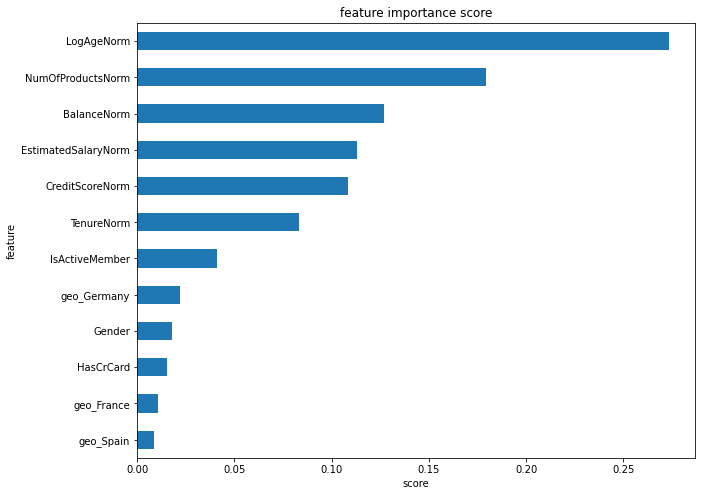

In [ ]:
feat_importances = pd.Series(rf_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

## AdaBoost

In [ ]:

ad = AdaBoostClassifier(random_state=42)
ad.fit(X_train,y_train)

y_pred = ad.predict(X_test)


### Evaluation

In [ ]:
ad_recall=recall_score(y_test, y_pred)
ad_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%ad_recall)
print('Accuracy: %.2f'%ad_acc)


Recall: 0.59
Accuracy: 0.83


In [ ]:
print('Train score: ' + str(ad.score(X_train, y_train))) #accuracy
print('Test score:' + str(ad.score(X_test, y_test))) #accuracy

Train score: 0.819916142557652
Test score:0.8334167083541771


In [ ]:


# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

# Predict & Evaluation
y_pred = ab_tuned.predict(X_test)#Check performa dari model


### Evaluation

In [ ]:
ad_recall=recall_score(y_test, y_pred)
ad_acc=accuracy_score(y_test, y_pred)

In [ ]:
print('Recall: %.2f'%ad_recall)
print('Accuracy: %.2f'%ad_acc)


Recall: 0.57
Accuracy: 0.84


In [ ]:
train_score_adboost = ab_tuned.score(X_test, y_test)
test_score_adboost = ab_tuned.score(X_train, y_train)
print('Train score:', train_score_adboost) #accuracy
print('Test score:', test_score_adboost) #accuracy

Train score: 0.5681818181818182
Test score: 0.670440251572327


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


Text(0.5, 1.0, 'feature importance score')

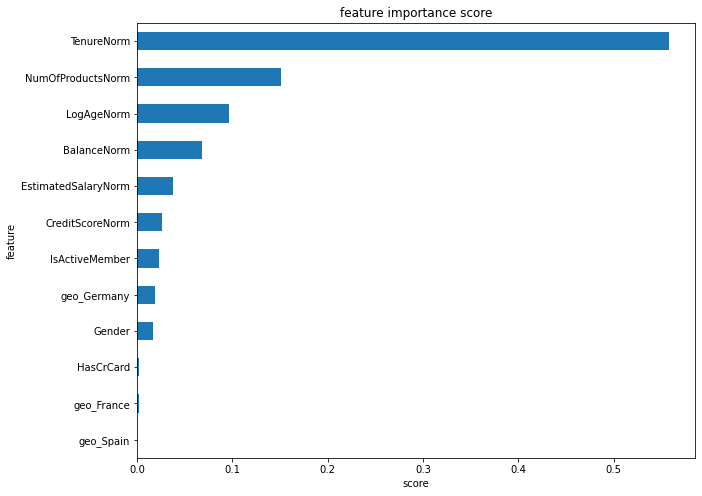

In [ ]:
feat_importances = pd.Series(ab_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [ ]:
models = ['Logistic Regression', 'Decision Tree','XGBoost', 'Random Forest','AdaBoost']
accuracy = [lr_acc, dt_acc, xg_acc, rf_acc, ad_acc]
recall = [lr_recall, dt_recall, xg_recall, rf_recall,ad_recall]
train_score = [train_score_lr, train_score_dt, train_score_xgboost, train_score_rf, train_score_adboost]
test_score = [test_score_lr, test_score_dt, test_score_xgboost, test_score_rf, test_score_adboost]

d = {'accuracy': accuracy, 'recall': recall, 'train_score': train_score, 'test_score': test_score}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,recall,train_score,test_score
Logistic Regression,0.800900,0.419192,0.477987,0.419192
Decision Tree,0.731866,0.560606,1.000000,0.560606
XGBoost,0.815408,0.631313,0.966038,0.631313
Random Forest,0.859930,0.553030,0.989937,0.553030
AdaBoost,0.844922,0.568182,0.568182,0.670440


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1464  139]
 [ 171  225]]


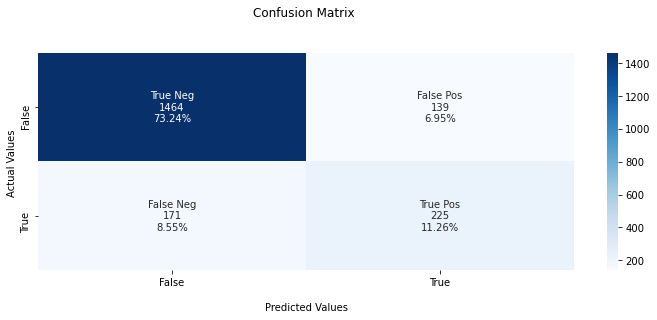

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()